## IMPORTS

import the required libraries

In [17]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import skimage
from skimage import io, filters
%matplotlib inline
img = 'tree.jpg'

## Helper Functions

**plot function:** takes two images and plot them alogside each other.

In [18]:
def plot(left_img, right_img, l_title="original", r_title="transformed"):
    f = plt.figure()
    l = f.add_subplot(1,2, 1)
    l.title.set_text(l_title)
    plt.imshow(left_img)
    r = f.add_subplot(1,2, 2)
    r.title.set_text(r_title)
    plt.imshow(right_img)
    r.set_yticklabels([])
    r.set_xticklabels([])
    l.set_yticklabels([])
    l.set_xticklabels([])


**sharpen function** takes 4 arguments: the image, two constants, constant a being the amount to multiply the original image by, and constant b being the amount to multiply the blurred image by, and an optional sigma, Higher values of sigma will cause more radical blurring.

In [19]:
def sharpen(image, a, b, sigma=10):
    blurred = filters.gaussian(image, sigma=sigma, multichannel=True)
    sharper = np.clip(image * a - blurred * b, 0, 1.0)
    return sharper

**channel_mult function** takes an  image channel and multiply it by certain value and ensure that the final value wouldn't exceed the limit of the pixel value.

In [20]:
def channel_mult(channel, value):
    limit = 1/value
    channel[channel>limit]=1
    channel[channel<=limit]*=value
    return channel

**get_channel function:** takes and image and return  a tuple of the image channels (red, green, blue).

**merge_channels function:** takes a tuple of the image channels and return image.

In [21]:
def get_channels(img):
    return img[:,:,0],img[:,:,1],img[:,:,2]
def merge_channels(r,g,b):
    return  np.dstack((r, g, b))

## Filters Implementation

#### Hot Desert Filter

In [22]:
def hot_desert_filter(img):
    orig_img = skimage.img_as_float(io.imread(img))
    trans_img = orig_img.copy()
    r,g,b = get_channels(trans_img)
    r = channel_mult(r,3)
    g = channel_mult(g,1.4)
    b = channel_mult(b,1.1)
    merged = merge_channels(r,g,b)
    trans_img = sharpen(merged, 1,0.2)
    plt.imshow(trans_img)

#### Cold Tibet Filter

In [23]:
def cold_tibet_filter(img):
    orig_img = skimage.img_as_float(io.imread(img))
    trans_img = orig_img.copy()
    r,g,b = get_channels(trans_img)
    r = channel_mult(r,1)
    g = channel_mult(g,1.6)
    b = channel_mult(b,1.4)
    merged = merge_channels(r,g,b)
    trans_img = sharpen(merged, 1,0.3)
    plt.imshow(trans_img)

#### Charming Filter

In [24]:
def charming_filter(img):
    orig_img = skimage.img_as_float(io.imread(img))
    trans_img = orig_img.copy()
    r,g,b = get_channels(trans_img)
    r = channel_mult(r,2.1)
    g = channel_mult(g,1.3)
    g = filters.gaussian(g,.4, multichannel=False)
    b = channel_mult(b,2.2)
    b = filters.gaussian(b,.7, multichannel=False)
    merged = merge_channels(r,g,b)
    trans_img = sharpen(merged, 1,0.3)
    plt.imshow(trans_img)

#### Blood Orange Filter

In [25]:
def blood_orange_filter(img):
    orig_img = skimage.img_as_float(io.imread(img))
    trans_img = orig_img.copy()
    r,g,b = get_channels(trans_img)
    r = channel_mult(r,1.5)
    g = channel_mult(g,1.6)
    b = channel_mult(b,1.7)
    merged = merge_channels(r,g,b)
    trans_img = sharpen(merged, 1,0.4)
    plt.imshow(trans_img)

#### Forest Filter

In [26]:
def forest_filter(img):
    orig_img = skimage.img_as_float(io.imread(img))
    trans_img = orig_img.copy()
    r,g,b = get_channels(trans_img)
    r = channel_mult(r,1)
    g = channel_mult(g,1.6)
    b = channel_mult(b,1)
    merged = merge_channels(r,g,b)
    trans_img = sharpen(merged, 1,0.2)
    plt.imshow(trans_img)

In [27]:
def insta_like(img, filter_name):
    if filter_name == 'forest_filter':
        forest_filter(img)
    elif filter_name == 'blood_orange_filter':
        blood_orange_filter(img)
    elif filter_name == 'charming_filter':
        charming_filter(img)
    elif filter_name == 'cold_tibet_filter':
        cold_tibet_filter(img)
    elif filter_name == 'hot_desert_filter':
        hot_desert_filter(img)

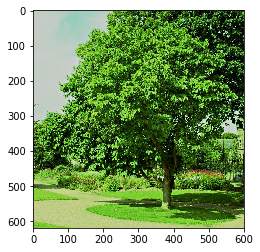

In [28]:
insta_like(img, 'forest_filter')

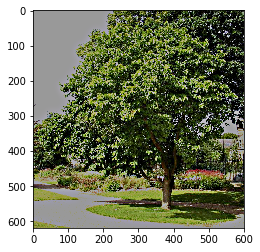

In [29]:
insta_like(img, 'blood_orange_filter')

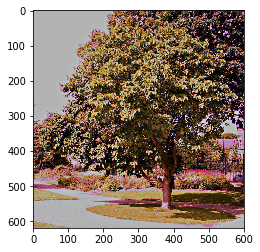

In [30]:
insta_like(img, 'charming_filter')

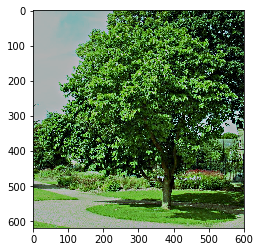

In [31]:
insta_like(img, 'cold_tibet_filter')

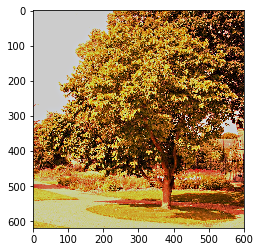

In [32]:
insta_like(img, 'hot_desert_filter')